In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/ECE219/Project4'

Mounted at /content/gdrive
/content/gdrive/My Drive/ECE219/Project4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline



# Diamonds Dataset

In [ ]:
diamonds = pd.read_csv('diamonds.csv')


In [ ]:
diamonds = diamonds.replace(['J','Fair','I1'],1)
diamonds = diamonds.replace(['I','Good','SI2'],2)
diamonds = diamonds.replace(['H','Very Good','SI1'],3)
diamonds = diamonds.replace(['G','Premium','VS2'],4)
diamonds = diamonds.replace(['F','Ideal','VS1'],5)
diamonds = diamonds.replace(['E','VVS2'],6)
diamonds = diamonds.replace(['D','VVS1'],7)
diamonds = diamonds.replace(['IF'],8)

In [ ]:
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,5,7,3,60.8,57.0,2758,5.75,5.76,3.50
53936,53937,0.72,2,7,3,63.1,55.0,2759,5.69,5.75,3.61
53937,53938,0.70,3,7,3,62.8,60.0,2760,5.66,5.68,3.56
53938,53939,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


### Q 1.1

<AxesSubplot:>

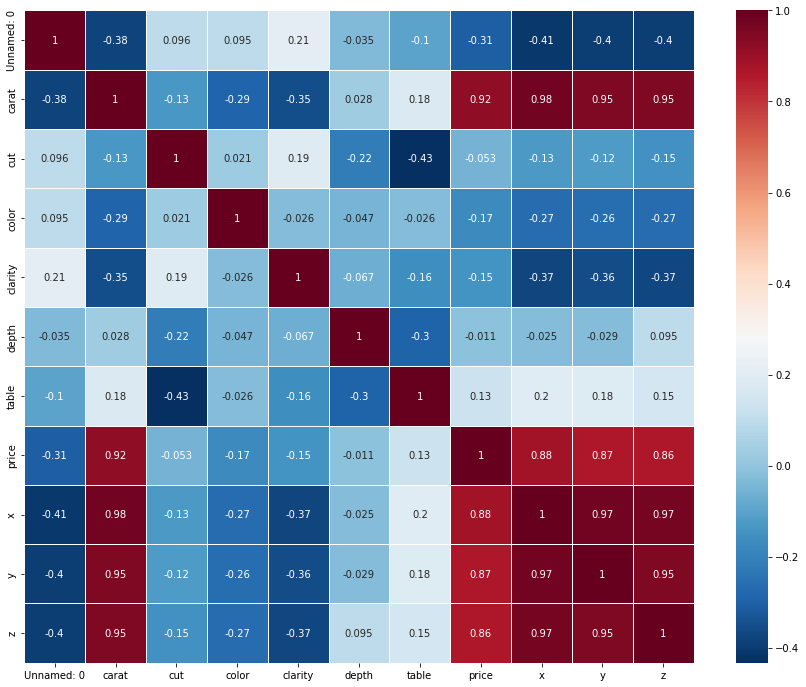

In [ ]:

diamonds_corr = diamonds.corr()
plt.figure(figsize=(15,12))
sb.heatmap(diamonds_corr,xticklabels=diamonds_corr.columns,yticklabels=diamonds_corr.columns,cmap= 'RdBu_r',annot=True,linewidth = 0.5)


### Q1.2

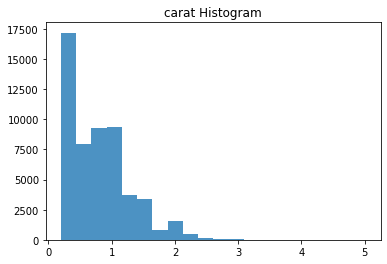

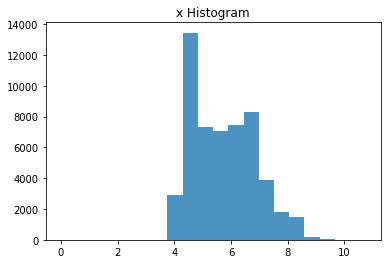

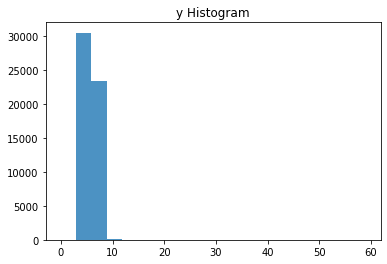

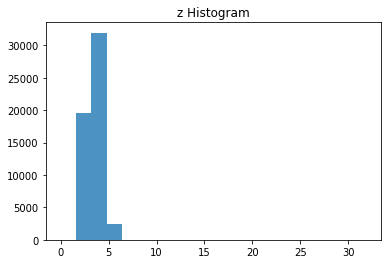

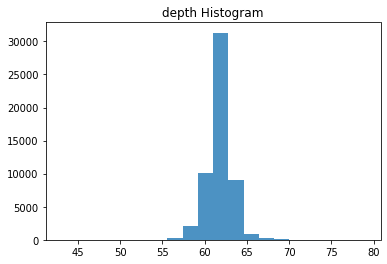

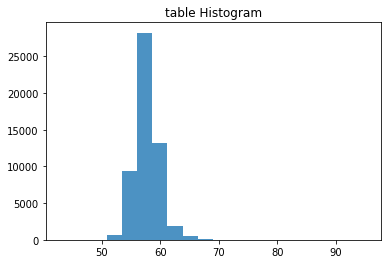

In [ ]:
num_feature = ['carat','x','y','z','depth','table']
for i in range(len(num_feature)):
  plt.figure()
  plt.hist(diamonds[num_feature[i]], bins=20, linewidth=1.5, alpha=0.8)
  plt.title(f'{num_feature[i]} Histogram')

### Q1.3

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


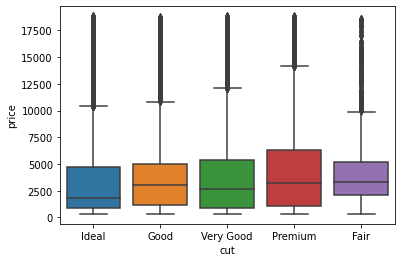

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


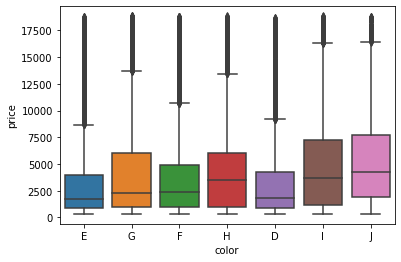

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


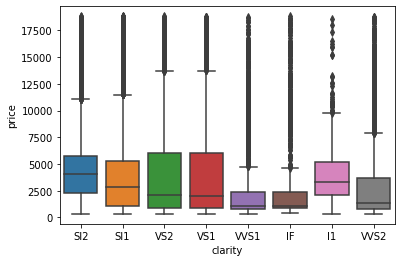

In [ ]:
diamonds_orig = pd.read_csv('diamonds.csv')
cat_feature = ['cut','color','clarity']
tar_feature = ['price']
for item in cat_feature:
  sb.boxplot(diamonds_orig[item], diamonds_orig[tar_feature[0]], order=list(set(diamonds_orig[item])))
  plt.show()

### Q1.4

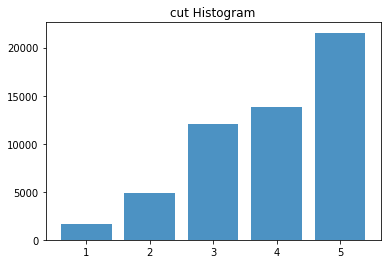

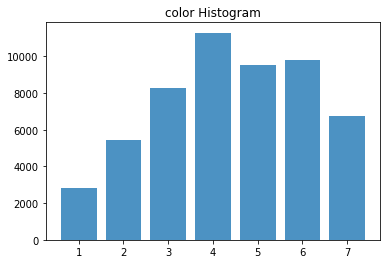

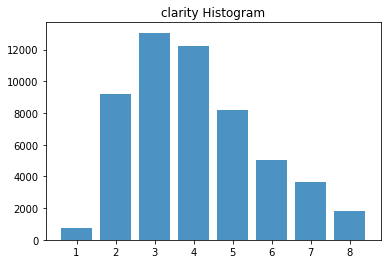

In [ ]:
cat_fea_num = [5,7,8]
for i in range(3):
  count_list = []
  for j in range(1,cat_fea_num[i]+1):
    count_list.append(np.sum(diamonds[cat_feature[i]]==j))
  plt.figure()
  plt.bar(list(range(1,cat_fea_num[i]+1)),count_list, linewidth=1.5, alpha=0.8)
  plt.title(f'{cat_feature[i]} Histogram')


### Q2.1

In [ ]:
# standardization
X_dia = diamonds.drop(['price'],axis=1)
X_dia = X_dia.iloc[: , 1:]
X_dia_standard = preprocessing.scale(X_dia)

Y_dia = diamonds['price']
Y_dia_standard = preprocessing.scale(Y_dia)


In [ ]:
X_dia

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,6.15,6.12,3.74


In [ ]:
X_dia_standard

array([[-1.19816781,  0.98147332,  0.93716275, ..., -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129,  0.08588908,  0.93716275, ..., -1.64132529,
        -1.65877419, -1.74117497],
       [-1.19816781, -1.70527938,  0.93716275, ..., -1.49869105,
        -1.45739502, -1.74117497],
       ...,
       [-0.20662095, -0.80969515,  1.52502147, ..., -0.06343409,
        -0.04774083,  0.03013526],
       [ 0.13092691,  0.08588908, -0.8264134 , ...,  0.37338325,
         0.33750627,  0.28520393],
       [-0.10113725,  0.98147332,  1.52502147, ...,  0.08811478,
         0.11861587,  0.14349912]])

In [ ]:
Y_dia

0         330
1         327
2         328
3         337
4         338
         ... 
53935    2758
53936    2759
53937    2760
53938    2757
53939    2761
Name: price, Length: 53940, dtype: int64

In [ ]:
Y_dia_standard

array([-0.90359371, -0.9043457 , -0.90409503, ..., -0.29448037,
       -0.29523236, -0.29422971])

### Q2.2

In [ ]:
# feature Selection
MutualInfo = mutual_info_regression(X_dia, Y_dia)
Fstatic, pvalue = f_regression(X_dia, Y_dia)

In [ ]:
feature = ['carat','cut','color','clarity','depth','table','x','y','z']
MI_sort = np.argsort(MutualInfo)[::-1]
print("Based on MI sorting in descending order:")
MI_fea = [feature[i] for i in MI_sort]
print(MI_fea)
print(f"lowest two is {MI_fea[-1]} and {MI_fea[-2]} ")
FS_sort = np.argsort(Fstatic)[::-1]
print("Based on FS sorting:")
FS_fea = [feature[i] for i in FS_sort]
print(FS_fea)
print(f"lowest two is {FS_fea[-1]} and {FS_fea[-2]} ")

Based on MI sorting in descending order:
['carat', 'y', 'x', 'z', 'clarity', 'color', 'cut', 'table', 'depth']
lowest two is depth and table 
Based on FS sorting:
['carat', 'x', 'y', 'z', 'color', 'clarity', 'table', 'cut', 'depth']
lowest two is depth and cut 


In [ ]:
top5_MI = MI_sort[:5]
top5_FS = FS_sort[:5]

X_dia_top5_MI = X_dia.iloc[:, top5_MI]
X_dia_top5_FS = X_dia.iloc[:, top5_FS]

### Q4

##### ordinary MSE

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Linear_standard = Pipeline([
    ('standardize', preprocessing.StandardScaler()),
    ('model', LinearRegression())
])

Linear_nonstandard = Pipeline([
    ('model', LinearRegression())
])

Linear_train_score,Linear_test_score = [],[]
options = [X_dia_top5_MI, X_dia_top5_FS]

for x in options:
  cv_results = cross_validate(Linear_nonstandard, x, Y_dia, scoring='neg_root_mean_squared_error', 
                              return_train_score=True, cv=10)
  Linear_train_score.append(np.mean(cv_results['train_score']))
  Linear_test_score.append(np.mean(cv_results['test_score']))

  cv_results = cross_validate(Linear_standard, x, Y_dia, scoring='neg_root_mean_squared_error', 
                              return_train_score=True, cv=10)
  Linear_train_score.append(np.mean(cv_results['train_score']))
  Linear_test_score.append(np.mean(cv_results['test_score']))



In [ ]:
Linear_results = pd.DataFrame(data={'param_model': 'LinearRegression()', 'param_model__alpha': 'NA',
                                    'mean_test_score': Linear_test_score, 'mean_train_score': Linear_train_score,
                                    'Standardize': [False, True, False, True], 
                                    'Feature Selection': ['Mutual Information', 'Mutual Information', 'F Scores', 'F Scores']})
Linear_results

,param_model,param_model__alpha,mean_test_score,mean_train_score,Standardize,Feature Selection
0,LinearRegression(),NA,-1301.094107,-1327.377220,False,Mutual Information
1,LinearRegression(),NA,-1301.094107,-1327.377220,True,Mutual Information
2,LinearRegression(),NA,-1375.540846,-1454.506944,False,F Scores
3,LinearRegression(),NA,-1375.540846,-1454.506944,True,F Scores


##### lasso and ridge regression

In [ ]:
Linear_standard = Pipeline([
    ('standardize', preprocessing.StandardScaler()),
    ('model', LinearRegression())
])

Linear_nonstandard = Pipeline([
    ('model', LinearRegression())
])

param_grid = {
    'model': [Ridge(random_state=42, max_iter=10000), Lasso(random_state=42, max_iter=10000)],
    'model__alpha': [10.0**x for x in np.arange(-3,4)]
}

In [ ]:
grid1 = GridSearchCV(Linear_nonstandard, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_dia_top5_MI, Y_dia)
                     
Linear_result1 = pd.DataFrame(grid1.cv_results_)[['param_model','param_model__alpha','mean_test_score','mean_train_score']]
Linear_result1['Standardize'] = False
Linear_result1['Feature Selection'] = 'Mutual Information'

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [ ]:
grid2 = GridSearchCV(Linear_nonstandard, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_dia_top5_FS, Y_dia)
                     
Linear_result2 = pd.DataFrame(grid2.cv_results_)[['param_model','param_model__alpha','mean_test_score','mean_train_score']]
Linear_result2['Standardize'] = False
Linear_result2['Feature Selection'] = 'F Scores'

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [ ]:
grid3 = GridSearchCV(Linear_standard, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_dia_top5_MI, Y_dia)

Linear_result3 = pd.DataFrame(grid3.cv_results_)[['param_model','param_model__alpha','mean_test_score','mean_train_score']]
Linear_result3['Standardize'] = True
Linear_result3['Feature Selection'] = 'Mutual Information'

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [ ]:
grid4 = GridSearchCV(Linear_nonstandard, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_dia_top5_FS, Y_dia)
                     
Linear_result4 = pd.DataFrame(grid4.cv_results_)[['param_model','param_model__alpha','mean_test_score','mean_train_score']]
Linear_result4['Standardize'] = True
Linear_result4['Feature Selection'] = 'F Scores'

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [ ]:
Result = pd.concat([Linear_results, Linear_result1, Linear_result2, Linear_result3, Linear_result4])
Result = Result.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
Result

,param_model,param_model__alpha,mean_test_score,mean_train_score,Standardize,Feature Selection
0,"Lasso(alpha=0.1, max_iter=10000, random_state=42)",0.1,-1300.986288,-1327.377796,False,Mutual Information
1,LinearRegression(),NA,-1301.094107,-1327.377220,True,Mutual Information
2,LinearRegression(),NA,-1301.094107,-1327.377220,False,Mutual Information
3,"Ridge(alpha=0.001, max_iter=10000, random_stat...",0.001,-1301.094163,-1327.377220,True,Mutual Information
4,"Ridge(alpha=0.001, max_iter=10000, random_stat...",0.001,-1301.094406,-1327.377220,False,Mutual Information
5,"Ridge(alpha=0.001, max_iter=10000, random_stat...",0.01,-1301.094661,-1327.377220,True,Mutual Information
6,"Lasso(alpha=0.1, max_iter=10000, random_state=42)",0.001,-1301.095092,-1327.377220,True,Mutual Information
7,"Lasso(alpha=0.1, max_iter=10000, random_state=42)",0.001,-1301.095641,-1327.377220,False,Mutual Information
8,"Ridge(alpha=0.001, max_iter=10000, random_stat...",0.01,-1301.097097,-1327.377220,False,Mutual Information
9,"Ridge(alpha=0.001, max_iter=10000, random_stat...",0.1,-1301.099650,-1327.377220,True,Mutual Information


#### Q4.2

In [ ]:
Result.head(5)

,param_model,param_model__alpha,mean_test_score,mean_train_score,Standardize,Feature Selection
0,"Lasso(alpha=0.1, max_iter=10000, random_state=42)",0.1,-1300.986288,-1327.377796,False,Mutual Information
1,LinearRegression(),NA,-1301.094107,-1327.377220,True,Mutual Information
2,LinearRegression(),NA,-1301.094107,-1327.377220,False,Mutual Information
3,"Ridge(alpha=0.001, max_iter=10000, random_stat...",0.001,-1301.094163,-1327.377220,True,Mutual Information
4,"Ridge(alpha=0.001, max_iter=10000, random_stat...",0.001,-1301.094406,-1327.377220,False,Mutual Information


#### Q4.4

In [ ]:
Dia_fit = sm.OLS(Y_dia, sm.add_constant(X_dia)).fit()
print(Dia_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 5.845e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        02:23:37   Log-Likelihood:            -4.5972e+05
No. Observations:               53940   AIC:                         9.195e+05
Df Residuals:                   53930   BIC:                         9.195e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2783.6213    428.811      6.491      0.0

In [ ]:
print(Dia_fit.pvalues.sort_values(ascending=True))

carat       0.000000e+00
color       0.000000e+00
clarity     0.000000e+00
x          3.098309e-136
cut         1.113990e-98
depth       4.663890e-62
table       1.130952e-19
const       8.572397e-11
y           3.501855e-02
z           4.158692e-01
dtype: float64


### Polynomial Regression 

In [ ]:
degree_list = np.arange(1,11,1)

Poly_Reg = Pipeline([
    ('Poly', PolynomialFeatures()),
    ('model', Ridge(alpha=0.001, random_state=42, max_iter=2000))
])


param_grid_poly = {
    'Poly__degree': degree_list,
    # 'model__alpha': [10.0**x for x in np.arange(-2,2)]
    
}

In [ ]:
grid_poly = GridSearchCV(Poly_Reg, param_grid=param_grid_poly, cv=3, n_jobs=-1, verbose=1, 
                         scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_dia_top5_FS, Y_dia)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
Poly_result = pd.DataFrame(grid_poly.cv_results_)[['mean_test_score', 'mean_train_score', 'param_Poly__degree']]
Poly_result


,mean_test_score,mean_train_score,param_Poly__degree
0,-1.922398e+03,-1305.198593,1
1,-2.517945e+03,-1126.680180,2
2,-4.408673e+04,-1066.626473,3
3,-1.316139e+06,-1039.104619,4
4,-5.975466e+08,-1020.780639,5
5,-1.349976e+10,-1002.428207,6
6,-4.863352e+11,-991.272855,7
7,-1.696110e+13,-984.476461,8
8,-1.119390e+15,-1028.724459,9
9,-1.003411e+17,-3689.784904,10


### Q5.2

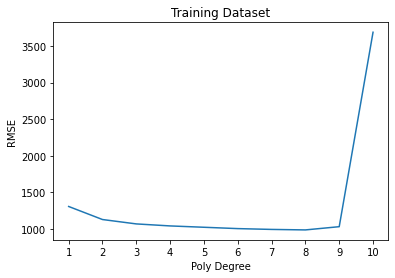

In [ ]:

plt.plot(Poly_result['param_Poly__degree'], -Poly_result['mean_train_score'])
plt.xticks(np.arange(1,11))
plt.title('Training Dataset')
plt.xlabel('Poly Degree')
plt.ylabel('RMSE')

plt.show()





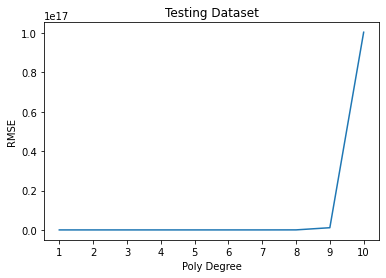

In [ ]:

plt.plot(Poly_result['param_Poly__degree'], -Poly_result['mean_test_score'])
plt.xticks(np.arange(1,11))
plt.title('Testing Dataset')
plt.xlabel('Poly Degree')
plt.ylabel('RMSE')
plt.show()

## Neural Network

In [ ]:
import itertools
from sklearn.neural_network import MLPRegressor

In [ ]:
Neu_net = Pipeline([
    ('model', MLPRegressor(random_state=42,max_iter=1000))
])

param_grid_NN = {
    'model__hidden_layer_sizes': [50,100,150],
    'model__alpha': [0.1,0.05],
    'model__activation': ['logistic', 'tanh', 'relu']   
}

In [ ]:
grid_NN = GridSearchCV(Neu_net, param_grid=param_grid_NN, cv=3, n_jobs=-1, verbose=3, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_dia_top5_FS, Y_dia)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [ ]:
NN_result = pd.DataFrame(grid_NN.cv_results_)[['mean_test_score', 'mean_train_score','param_model__alpha', 'param_model__activation','param_model__hidden_layer_sizes']]
NN_result

,mean_test_score,mean_train_score,param_model__alpha,param_model__activation,param_model__hidden_layer_sizes
0,-2531.072338,-1651.174332,0.1,logistic,50
1,-2614.822744,-1084.002618,0.1,logistic,100
2,-2577.544962,-1075.154017,0.1,logistic,150
3,-2520.947944,-1651.585306,0.05,logistic,50
4,-2604.525794,-1083.032369,0.05,logistic,100
5,-2582.066628,-1075.528365,0.05,logistic,150
6,-2539.913892,-1667.465445,0.1,tanh,50
7,-2617.232238,-1068.720766,0.1,tanh,100
8,-2587.460181,-1059.011605,0.1,tanh,150
9,-2568.988211,-1683.499715,0.05,tanh,50


In [ ]:
NN_result = NN_result.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
NN_result.head(5)

,mean_test_score,mean_train_score,param_model__alpha,param_model__activation,param_model__hidden_layer_sizes
0,-2124.457960,-1148.544467,0.05,relu,50
1,-2129.099751,-1119.747488,0.1,relu,150
2,-2135.223607,-1147.831260,0.1,relu,50
3,-2136.951189,-1122.040269,0.05,relu,150
4,-2185.860908,-1090.848388,0.05,relu,100


### Random Forest

In [ ]:
Rand_Forest = Pipeline([
    ('model', RandomForestRegressor(random_state=42, oob_score=True))
])

param_grid_rf_n_est = {
    'model__n_estimators': np.arange(10, 110, 10),
}
param_grid_rf_max_depth = {
    'model__max_depth': np.arange(1, 11, 1),
}
param_grid_rf_max_features = {
    'model__max_features': np.arange(1,6,1),
}

In [ ]:
grid_Randf_n_est = GridSearchCV(Rand_Forest, param_grid=param_grid_rf_n_est, cv=3, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_dia_top5_FS, Y_dia)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
RF_n_est_result = pd.DataFrame(grid_Randf_n_est.cv_results_)[['mean_test_score', 'mean_train_score','param_model__n_estimators']]
RF_n_est_result = RF_n_est_result.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
RF_n_est_result

,mean_test_score,mean_train_score,param_model__n_estimators
0,-2560.858602,-394.226798,70
1,-2560.901436,-391.652445,100
2,-2561.083798,-398.588745,50
3,-2561.352067,-395.968755,60
4,-2561.515648,-401.919682,40
5,-2561.670321,-392.295855,90
6,-2562.858102,-393.321323,80
7,-2563.685590,-407.346573,30
8,-2567.990396,-418.317006,20
9,-2584.756934,-453.975356,10


In [ ]:
grid_Randf_max_depth = GridSearchCV(Rand_Forest, param_grid=param_grid_rf_max_depth, cv=3, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_dia_top5_FS, Y_dia)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
RF_max_depth_result = pd.DataFrame(grid_Randf_max_depth.cv_results_)[['mean_test_score', 'mean_train_score','param_model__max_depth']]
RF_max_depth_result = RF_max_depth_result.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
RF_max_depth_result

,mean_test_score,mean_train_score,param_model__max_depth
0,-2545.037465,-902.420036,10
1,-2553.364138,-933.939067,9
2,-2565.406051,-961.000493,8
3,-2586.393415,-986.048453,7
4,-2612.870295,-1011.318995,6
5,-2638.399238,-1038.791420,5
6,-2775.470270,-1094.951932,4
7,-3016.423961,-1181.922977,3
8,-3643.462518,-1321.546426,2
9,-4040.260624,-1849.636170,1


In [ ]:
grid_Randf_max_features = GridSearchCV(Rand_Forest, param_grid=param_grid_rf_max_features, cv=3, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_dia_top5_FS, Y_dia)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
RF_max_features_result = pd.DataFrame(grid_Randf_max_features.cv_results_)[['mean_test_score', 'mean_train_score','param_model__max_features']]
RF_max_features_result = RF_max_features_result.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
RF_max_features_result

,mean_test_score,mean_train_score,param_model__max_features
0,-2513.691814,-385.153929,1
1,-2516.882706,-386.561903,2
2,-2528.974995,-388.456548,3
3,-2545.840796,-390.198116,4
4,-2560.901436,-391.652445,5


#### Q7.3

In [ ]:
rf_best_diamond = RandomForestRegressor(n_estimators=70, max_features=1, max_depth=4, random_state=42, oob_score=True).fit(X_dia_top5_FS, Y_dia)

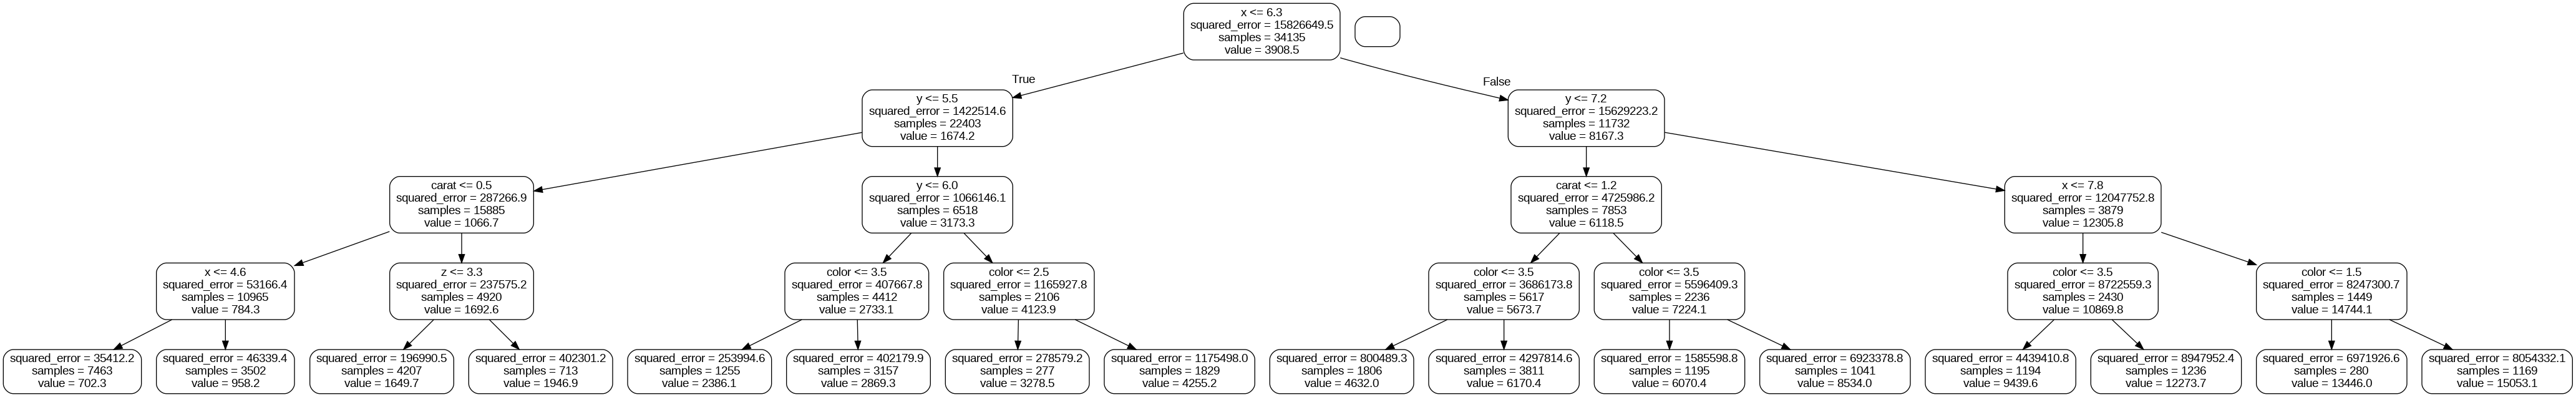

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(rf_best_diamond.estimators_[1], out_file = 'rf_diamond.dot', feature_names = X_dia_top5_FS.columns, rounded = True, precision = 1)

import pydot

(graph, ) = pydot.graph_from_dot_file('rf_diamond.dot')

from IPython.display import Image

Image(graph.create_png())


#### Q7.4

In [ ]:

print(f'OOB score is {rf_best_diamond.oob_score_}')
print(f'R2 score is {rf_best_diamond.score(X_dia_top5_FS, Y_dia)}')

OOB score is 0.8929043764923006
R2 score is 0.8942524754183203


In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skopt import BayesSearchCV
from catboost import CatBoostRegressor

In [ ]:
CBoost = BayesSearchCV(
    CatBoostRegressor(random_state=42,verbose=2,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'l2_leaf_reg': [10.0**x for x in np.arange(-2,2)],
        'max_depth': np.arange(1,11,2),
        'n_estimators': np.arange(10, 210, 10)
        
    },
    #n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

In [ ]:
_=CBoost.fit(X_dia_top5_FS, Y_dia)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 3883.2694169	total: 18.6ms	remaining: 3.52s
2:	learn: 3682.5618464	total: 49.7ms	remaining: 3.1s
4:	learn: 3494.8339123	total: 79.2ms	remaining: 2.93s
6:	learn: 3319.3572835	total: 110ms	remaining: 2.87s
8:	learn: 3155.7215413	total: 135ms	remaining: 2.72s
10:	learn: 3001.6806027	total: 165ms	remaining: 2.69s
12:	learn: 2859.1281954	total: 195ms	remaining: 2.65s
14:	learn: 2726.4836784	total: 231ms	remaining: 2.69s
16:	learn: 2602.6047818	total: 261ms	remaining: 2.65s
18:	learn: 2487.1806370	total: 291ms	remaining: 2.62s
20:	learn: 2379.5629731	total: 321ms	remaining: 2.58s
22:	learn: 2281.5291736	total: 357ms	remaining: 2.59s
24:	learn: 2189.7579532	total: 392ms	remaining: 2.58s
26:	learn: 2104.6893933	total: 424ms	remaining: 2.56s
28:	learn: 2026.2097590	total: 455ms	remaining: 2.53s
30:	learn: 1953.6517221	total: 486ms	remaining: 2.49s
32:	learn: 1886.9274150	total: 515ms	remaining: 2.45s
34:	learn: 1825.4464423	to

In [ ]:
print('Best parameters: ',CBoost.best_params_,',Test RMSE:',CBoost.best_score_)
print('Train RMSE:',min(CBoost.cv_results_['mean_train_score']))

Best parameters:  OrderedDict([('l2_leaf_reg', 0.1), ('max_depth', 9), ('n_estimators', 190)]) ,Test RMSE: -2402.4757755117175
Train RMSE: -1784.173332356686


In [ ]:
CB_result = pd.DataFrame(CBoost.cv_results_)[['mean_test_score', 'mean_train_score', 'param_max_depth','param_n_estimators','param_l2_leaf_reg']]

CB_result

,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,param_l2_leaf_reg
0,-2405.774107,-1005.839645,7,190,0.1
1,-2498.588792,-1135.401174,9,70,10.0
2,-2742.770576,-1784.173332,9,30,0.1
3,-2557.041876,-1076.520494,3,120,1.0
4,-2470.003545,-1054.375205,5,110,1.0
5,-2632.005180,-1502.057606,9,40,1.0
6,-2480.105607,-1095.016894,7,80,1.0
7,-2439.753383,-1038.458781,9,100,1.0
8,-2414.090497,-1016.599852,7,180,10.0
9,-2412.662167,-1016.111002,7,150,0.01


In [ ]:

CB_result = CB_result.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
CB_result
     

,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,param_l2_leaf_reg
0,-2402.475776,-991.210192,9,190,0.1
1,-2402.475776,-991.210192,9,190,0.1
2,-2402.475776,-991.210192,9,190,0.1
3,-2402.475776,-991.210192,9,190,0.1
4,-2402.475776,-991.210192,9,190,0.1
5,-2402.475776,-991.210192,9,190,0.1
6,-2402.475776,-991.210192,9,190,0.1
7,-2402.475776,-991.210192,9,190,0.1
8,-2402.475776,-991.210192,9,190,0.1
9,-2402.475776,-991.210192,9,190,0.1
